In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
train = pd.read_csv(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input\train.csv")
test = pd.read_csv(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input\test.csv")

## KNN without scaler

In [3]:
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
#Y_train = train.Activity.values.astype(object)
Y_train = train['Activity']
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
#Y_test = test.Activity.values.astype(object)
Y_test = test['Activity']

In [4]:
# Test options and evaluation metric
#num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.83      0.88       491
          STANDING       0.86      0.95      0.90       532
           WALKING       0.88      0.98      0.92       496
WALKING_DOWNSTAIRS       0.96      0.79      0.87       420
  WALKING_UPSTAIRS       0.88      0.91      0.89       471

          accuracy                           0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.91      0.91      2947



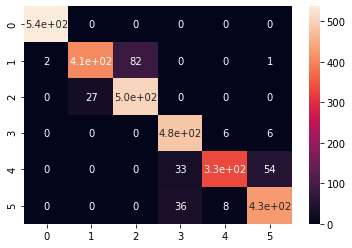

In [5]:
# Finalizing the model and comparing the test, predict results
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
model = KNeighborsClassifier(algorithm= 'brute', n_neighbors= 6, p = 1, weights= 'distance')

_ = cross_val_score(model, X_train, Y_train, cv=10, scoring=scoring)
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, Y_train) 
y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(Y_test, y_predict)

print(classification_report(Y_test, y_predict))

cm= confusion_matrix(Y_test, y_predict)
sns.heatmap(cm, annot=True)

## KNN with scaler

In [6]:
# Reading the data
train = pd.read_csv(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input\train.csv")
test = pd.read_csv(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input\test.csv")



In [7]:
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
#Y_train = train.Activity.values.astype(object)
Y_train = train['Activity']
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
#Y_test = test.Activity.values.astype(object)
Y_test = test['Activity']

In [8]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
X_train = slc.fit_transform(X_train)
X_test = slc.fit_transform(X_test)

In [11]:
# Test options and evaluation metric
#num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

                    precision    recall  f1-score   support

            LAYING       0.99      0.98      0.99       537
           SITTING       0.92      0.85      0.88       491
          STANDING       0.88      0.95      0.91       532
           WALKING       0.88      0.95      0.92       496
WALKING_DOWNSTAIRS       0.94      0.82      0.88       420
  WALKING_UPSTAIRS       0.88      0.92      0.90       471

          accuracy                           0.91      2947
         macro avg       0.92      0.91      0.91      2947
      weighted avg       0.92      0.91      0.91      2947



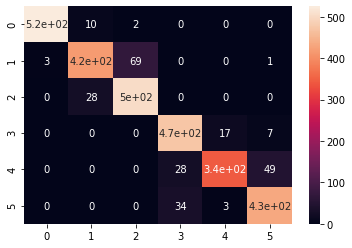

In [12]:
# Finalizing the model and comparing the test, predict results
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
model = KNeighborsClassifier(algorithm= 'brute', n_neighbors= 6, p= 1, weights= 'distance')

_ = cross_val_score(model, X_train, Y_train, cv=10, scoring=scoring)
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, Y_train) 
y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(Y_test, y_predict)

print(classification_report(Y_test, y_predict))

cm= confusion_matrix(Y_test, y_predict)
sns.heatmap(cm, annot=True)

## KNN with scaler and PCA

In [13]:
# Reading the data
train = pd.read_csv(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input\train.csv")
test = pd.read_csv(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input\test.csv")

In [14]:
X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
#Y_train = train.Activity.values.astype(object)
Y_train = train['Activity']
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
#Y_test = test.Activity.values.astype(object)
Y_test = test['Activity']

In [15]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
X_train = slc.fit_transform(X_train)
X_test = slc.fit_transform(X_test)

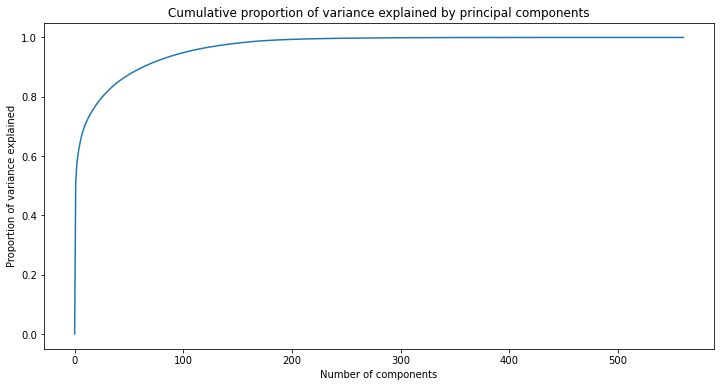

In [17]:
from sklearn.decomposition import PCA

pca_plot = PCA(n_components=X_train.shape[1])

pca_plot.fit(X_train)
cumulative_variance = [np.sum(pca_plot.explained_variance_ratio_[:i]) for i in range(X_train.shape[1])]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(cumulative_variance)
ax.set_title('Cumulative proportion of variance explained by principal components')
ax.set_xlabel('Number of components')
ax.set_ylabel('Proportion of variance explained')

plt.show()

In [21]:
cumulative_variance[100]

0.9489150399379711

In [22]:
# dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=0)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [23]:
X_test.shape

(2947, 102)

In [24]:
# Test options and evaluation metric
#num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

                    precision    recall  f1-score   support

            LAYING       0.99      0.94      0.96       537
           SITTING       0.89      0.75      0.81       491
          STANDING       0.79      0.95      0.86       532
           WALKING       0.87      0.97      0.92       496
WALKING_DOWNSTAIRS       0.96      0.78      0.86       420
  WALKING_UPSTAIRS       0.88      0.93      0.90       471

          accuracy                           0.89      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.90      0.89      0.89      2947



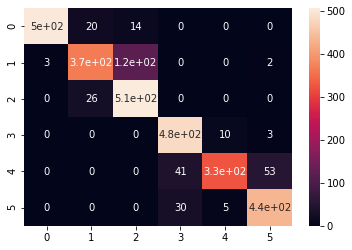

In [25]:
# Finalizing the model and comparing the test, predict results
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
model = KNeighborsClassifier(algorithm= 'brute', n_neighbors= 10, p= 1, weights= 'distance')

_ = cross_val_score(model, X_train, Y_train, cv=10, scoring=scoring)
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, Y_train) 
y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(Y_test, y_predict)

print(classification_report(Y_test, y_predict))

cm= confusion_matrix(Y_test, y_predict)
sns.heatmap(cm, annot=True)

## TSNE

In [30]:
train = pd.read_csv(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input\train.csv")
test = pd.read_csv(r"D:\Dropbox\Wisconsin School of Business\MSBA\CS 532\Jupyter NB\Final Project\input\test.csv")

X_train = pd.DataFrame(train.drop(['Activity','subject'],axis=1))
#Y_train = train.Activity.values.astype(object)
Y_train = train['Activity']
X_test = pd.DataFrame(test.drop(['Activity','subject'],axis=1))
#Y_test = test.Activity.values.astype(object)
Y_test = test['Activity']

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE()

X_reduced = tsne.fit_transform(X_train)

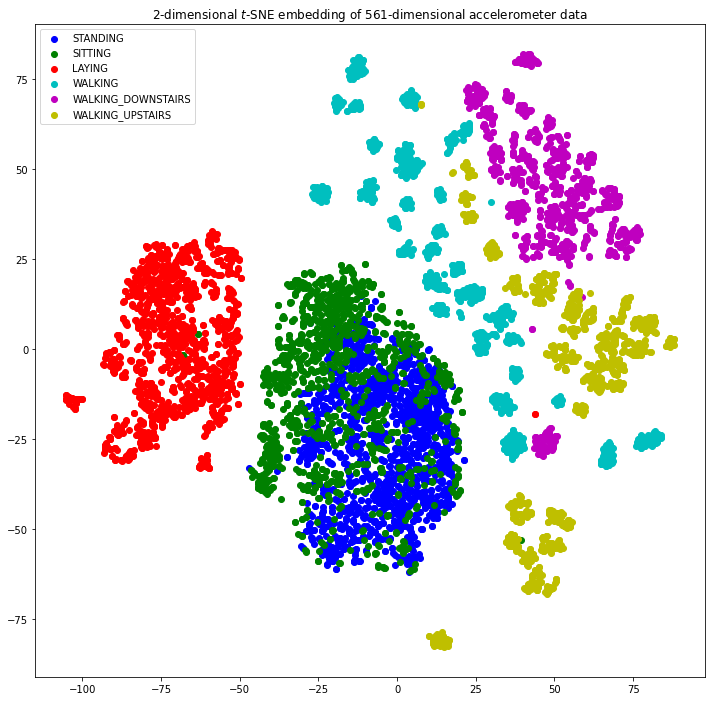

In [32]:
tsne_data = pd.DataFrame(
    {'X':X_reduced[:,0], 'Y':X_reduced[:,1], 
     'activity':train['Activity']})

activities = list(tsne_data['activity'].unique())
colormap = ['b', 'g', 'r', 'c', 'm', 'y']

fig, ax = plt.subplots(figsize=(12,12))
for i in range(len(activities)):
    plot_data = tsne_data.loc[tsne_data['activity'] == activities[i]]
    ax.scatter('X', 'Y', data=plot_data, color=colormap[i], label=activities[i])
ax.set_title('2-dimensional $t$-SNE embedding of 561-dimensional accelerometer data')
ax.legend()

plt.show()